# 2019年度信号処理課題の実験資料$*$
## F1,2クラス（水曜7–10限）担当：亀井
## F3,4クラス（木曜7–10限）担当：THAWONMAS
#### $^*$本教材の内容に関する問合せは THAWONMAS(ruck@is.ritsumei.ac.jp) まで

## 氏名：LUO Yiming，学生番号：2600170541-4

当課題の参考資料と共に本資料におけるすべての内容を学習した後，CC402のPCの作業フォルダ（`C:\Users\各自アカウント名\Downloads`）にある，各Codeセルの実行結果（各ミニ課題については正しい結果）が表示されている状態の本ファイルの最終版(拡張子.ipynbのファイル)をManaba+Rに提出せよ．

さて，以下の２つのCodeセルを必ず実行してから，学習を開始せよ．

In [2]:
%matplotlib inline

備考：`%matplotlib inline`はプロットの結果をこのnotebook中に表示するための命令である．

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

備考：必要なモジュールのインポート．

## 1. 離散フーリエ変換（DFT）

参考資料の(11)式より，$N$個のサンプルからなる信号$x$を表すベクトル$\vec{x}$に対するDFTは次の行列ベクトル積で計算できる．
\begin{equation}
\vec{X} = M \cdot \vec{x}
\end{equation}
ただし，$N\times N$行列$M$の要素は
$$
M_{kn} = e^{-j\frac{~2\pi~n~k~}{N}}
$$

### ミニ課題１

この式に基づいて以下のCodeセルでDFTの関数を実装しているが，変数1,2,3を適切に考えて同関数を完成させた後，実行せよ．

In [4]:
def DFT(x):
    """信号xに対してDFTを行う"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    X = np.exp(-2j * np.pi * n * k / N)
    return np.dot(X, x)

さて，以下のCodeセルを実行し，実装したDFT関数を確かめよ．実装が正しい場合は実行結果が  
[ 3.5$\hspace{1cm}$-0.5+1.21j$\hspace{1cm}$-0.5+0.5j$\hspace{1cm}$-0.5+0.21j  
$~$-0.5$\hspace{1cm}$-0.5-0.21j$\hspace{1cm}$-0.5-0.5j$\hspace{1cm}$-0.5-1.21j]  
に近い値となる．結果が異なる場合は，正しい結果が出るまで，「上のCodeセルにてDFT関数を修正，実行した後，下のCodeセルの実行」を繰り返せよ．

In [5]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
N = len(x)
scale = 1/N
fft_x1 = DFT(x)

print(scale*fft_x1)

[ 3.5+0.00000000e+00j -0.5+1.20710678e+00j -0.5+5.00000000e-01j
 -0.5+2.07106781e-01j -0.5-4.28626380e-16j -0.5-2.07106781e-01j
 -0.5-5.00000000e-01j -0.5-1.20710678e+00j]


備考：上のCodeセルの実行結果より，$X_0$(信号の平均値)及び$X_{N/2}$が実数で，それ以外の要素は複素数であることが確認できる．ただし，前記のDFT関数の実装上，$X_{N/2}$に非常に小さい値を持つ虚数が残っているが，ゼロと見なせる．また，$X_{N-k} = \overline{X_k}~(k = 1, 2, \cdots, \frac{N}{2}-1)$も確認できる．詳細は参考資料1.3.2節を参考せよ．

### 1.1. 直流成分の削除

さらに，正確な解析結果を得る為に，平均値を0とするデータ変換（参考資料1.4節）を実装している次のCodeセルを実行せよ．

In [6]:
fft_x2 = DFT(x-np.mean(x))

print(scale*fft_x2)

[ 0. +0.00000000e+00j -0.5+1.20710678e+00j -0.5+5.00000000e-01j
 -0.5+2.07106781e-01j -0.5-2.14313190e-16j -0.5-2.07106781e-01j
 -0.5-5.00000000e-01j -0.5-1.20710678e+00j]


備考：上のCodeセルの実行結果より，$X_0$の値が0になったことがわかる． 

## 2. 高速フーリエ変換（FFT）

以下に示すCodeセルでNumPyモジュールの[fft.fft関数](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html)を用いている．同Codeセルを実行し，結果を確かめよ．

In [7]:
fft_x3 = np.fft.fft(x-np.mean(x))

print(scale*fft_x3)

[ 0. +0.        j -0.5+1.20710678j -0.5+0.5       j -0.5+0.20710678j
 -0.5+0.        j -0.5-0.20710678j -0.5-0.5       j -0.5-1.20710678j]


### 2.1. DFTとFFTの実行時間の比較

次のCodeセルを実行し，DFTとFFTの実行時間を[timeit](https://docs.python.jp/3/library/timeit.html)の結果により比較せよ．

In [8]:
x = np.random.rand(1024)
N = len(x)

print("Length of x =", N)
print("Time for computation of DFT(x):")
%timeit DFT(x-np.mean(x))
print("Time for computation of FFT(x):")
%timeit np.fft.fft(x-np.mean(x))

Length of x = 1024
Time for computation of DFT(x):
99.5 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time for computation of FFT(x):
34.2 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


備考：結果より，FFTの方が高速であることがわかる．

### 2.2. ゼロパディングによるデータ数の調整

これまでの例に用いられたデータ数はいずれも2のべき乗$(N=2^r)$の形をとっているが，そうでない場合の実行時間を次のCodeセルを実行して検証せよ．

In [9]:
x = np.copy(x[:-5])
N = len(x)

print("Length of x =", N)
print("Time for computation of FFT(x):")
%timeit np.fft.fft(x-np.mean(x))

Length of x = 1019
Time for computation of FFT(x):
1.21 ms ± 740 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


備考：データ数が以前の例より5個少ないにも関わらず，実行時間が長くなった（µs単位からms単位になった）ことがわかる．

### ミニ課題２

次のCodeセルで，2のべき乗に満たないデータ数のデータを取り扱うとき，最も近い2のべき乗になるようにデータ系列の末尾に０を追加（ゼロパディング）してからFFTを行う例を示す．変数`len_p`は追加する0の数を表すもので，同変数の実装をどの$N$に対しても正しい結果を出す汎用的な形で完成させた後，FFTの実行結果を確かめよ．

In [10]:
len_p = 2**np.int(10)-N

print("Length of padded zeros =", len_p)
print('Time for computation of FFT(padded x):') 
%timeit np.fft.fft(np.append(x-np.mean(x),np.zeros(len_p)))

Length of padded zeros = 5
Time for computation of FFT(padded x):
40.7 µs ± 251 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


備考：`len_p`の実装が正しければ，`len_p`の値が5で実行時間の単位がµsに戻ったことがわかる．

### 2.3. パラメータ指定によるゼロパディングのFFT

実は，NumPyモジュールの[fft.fft関数](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft)には解析対象データ数を指定できる．この数字がデータ$x$の実際のデータ数$N$を上回るとき，足りない分のゼロパディングを行ってから，FFTを実施するようになっている．使用例は以下に示す．  
 `ideal_N = 2**np.int(np.ceil(np.log2(N)))`  
`np.fft.fft(x-np.mean(x),ideal_N)`  

### 2.4. 信号の時系列のプロット

次のCodeセルは，ある正弦波を標本化周波数50Hz，計測時間3sとして記録したデータをプロットするものである．同Codeセルを実行し，結果を確認せよ．

Text(0,0.5,'Signal')

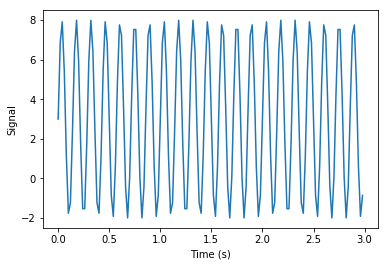

In [11]:
fs = 50 # in Hz
dt = 1/fs
f_sig =  7 # in Hz
start = 0.0 # in seconds
stop = 3.0 # in seconds
time = np.arange(start, stop, dt)
x = 5 * np.sin(2 * np.pi * f_sig * time) + 3

plt.plot(time, x)
plt.xlabel("Time (s)")
plt.ylabel("Signal")

### ミニ課題３

以下のCodeセルにある修正箇所を修正し，横軸の幅を[matplotlib.pyplot.xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html)を用いて1s～2s ([1s, 2s])と指定したときの前記のデータをプロットせよ．

Text(0,0.5,'Signal')

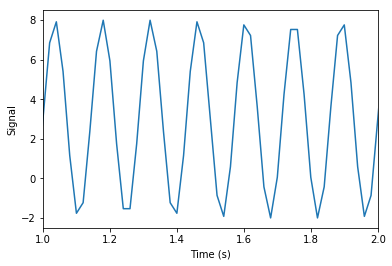

In [12]:
plt_start_t = 1.0 # in seconds
plt_stop_t = 2.0 # in seconds

plt.plot(time, x)
plt.xlim(plt_start_t, plt_stop_t)
plt.xlabel("Time (s)")
plt.ylabel("Signal")

### 2.5. 振幅スペクトルのプロット

前記の正弦波の振幅スペクトルをプロットするコードを以下のCodeセルで示す．同Codeセルを実行し，結果を確認せよ．

Text(0,0.5,'Amplitude')

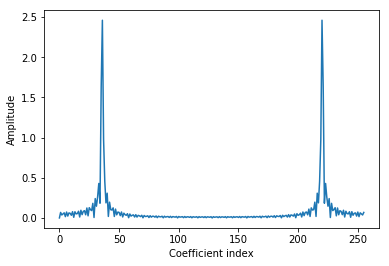

In [13]:
N = len(x)
ideal_N =  2**np.int(np.ceil(np.log2(N)))
fft_x = np.fft.fft(x-np.mean(x),ideal_N)
abs_fft_x = np.abs(fft_x)
scale = 1/N

plt.plot(scale*abs_fft_x)
plt.xlabel("Coefficient index")
plt.ylabel("Amplitude")

備考：  
1. 振幅スペクトルの正規化のためのscale係数は$\frac{1}{N}$である（参考資料1.4節）．ただし，$N$はゼロパディングを行う前のデータ数である．
2. この段階では横軸がフーリエ係数のインデックスを表している．次のCodeセルでの実装例のように，周波数(Hz)を示したい場合はNumPyモジュールの[fft.fftfreq関数](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html)を用いる．同Codeセルを実行し，結果を確認せよ．

Text(0,0.5,'Amplitude')

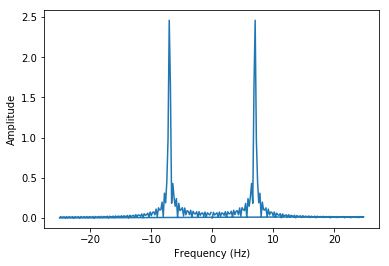

In [14]:
freq = np.fft.fftfreq(ideal_N, dt)

plt.plot(freq, scale*abs_fft_x)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

備考：この信号の周波数が7Hzであるため，振幅が$\pm7$Hz周辺に高い値をもっていることが確認できる．

### 2.6. 片側振幅スペクトルのプロット

周波数スペクトルが左右対称であることから，正の周波数のみ，つまり，片側のスペクトルだけで信号の全情報を含んでいることになる．ただし，片側振幅スペクトルをプロットする際には，負の周波数の振幅を考慮に入れる必要があるため，各当該周波数の振幅を2倍にする必要がある．Pythonの[スライス](https://docs.python.jp/3/tutorial/introduction.html)を応用した実装例を以下のCodeセルで示す．同Codeセルを実行し，結果を確認せよ．

Text(0,0.5,'Amplitude')

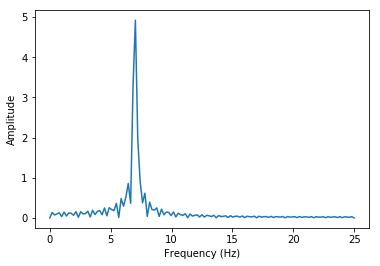

In [15]:
half_N = int(ideal_N/2.0)
abs_fft_x_onesided = np.copy(abs_fft_x[:half_N+1])
abs_fft_x_onesided[1:half_N] = 2*abs_fft_x_onesided[1:half_N]
freq_onesided = np.abs(freq[:half_N+1])

plt.plot(freq_onesided, scale*abs_fft_x_onesided)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

### 2.7. 片側パワースペクトルのプロット

パワースペクトルの正規化のためのscale係数は $\frac{1}{N^2}$である（参考資料1.4節）．また，片側パワースペクトルをプロットする際には片側振幅スペクトルと同じように各当該周波数のパワーを2倍にする必要がある．以下はnumpy.fftによる手法及びscipy.signal.periodogramによる手法を示す．

#### numpy.fftによる手法

[numpy.fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft)の関数を用いて`abs_fft_x`及び`freq_onesided`を得ているという前提で，両者を使って片側パワースペクトルのプロットするコードを以下のCodeセルで示す．同Codeセルを実行し，結果を確認せよ．

Text(0,0.5,'Power')

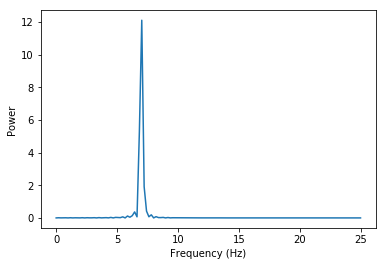

In [16]:
power_fft_x_onesided = np.copy(abs_fft_x[:half_N+1]**2)
power_fft_x_onesided[1:half_N] = 2*power_fft_x_onesided[1:half_N]
scale= 1/N**2

plt.plot(freq_onesided, scale*power_fft_x_onesided)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")

### ミニ課題４

以下のCodeセルにある修正箇所を修正し，横軸の幅を5Hz～15Hz（[5Hz, 15Hz]）としたときの片側パワースペクトルをプロットせよ．

Text(0,0.5,'Power')

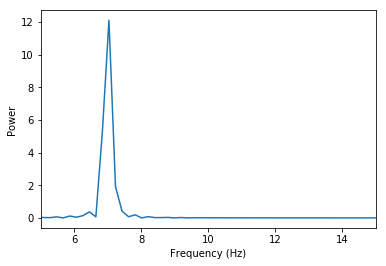

In [20]:
plt_start_f = 5.0 # in Hz
plt_stop_f = 15.0 # in Hz

plt.plot(freq_onesided, scale*power_fft_x_onesided)
plt.xlim(plt_start_f,plt_stop_f)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")

#### scipy.signal.periodogramによる手法

次のCodeセルで[scipy.signal.periodogram](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html)を用いて片側パワースペクトルのプロットするコードを示す．

Text(0,0.5,'Power')

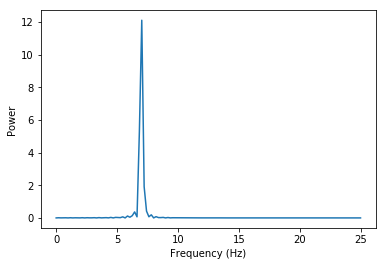

In [21]:
f, Pxx_spec = signal.periodogram(x, fs, nfft=ideal_N, scaling='spectrum')

plt.plot(f, Pxx_spec)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")

## 3. ファイル操作について

これまでの信号$x$を'signal.dat'というテキストファイルに保存するコードを以下のCodeセルで示す．同Codeセルを実行せよ．

In [22]:
np.savetxt('./signal.dat', x)

同ファイルを読み込んで信号の時系列をプロットするコードを次のCodeセルで示す．この信号は本資料の2.4節にあるように計測時間3s，標本化周波数 fs = 50[Hz]で標本化したため，標本化に関する変数が最初に定義されていることがわかる．同Codeセルを実行し，結果を確認せよ．

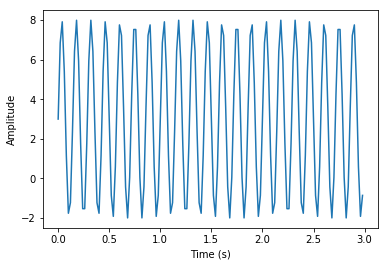

In [23]:
fs = 50
dt = 1/fs
start = 0.0 # in seconds
stop = 3.0 # in seconds
time = np.arange(start, stop, dt)
x=[]
x = np.loadtxt('./signal.dat')

plt.plot(time, x)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


## 4. その他

時間が余る場合，自分でいくつかの信号を生成し，生成した各信号に対してFFTを行い，その結果を標本定理（参考資料1.1節）などの観点で考察せよ．  
備考：CodeセルまたはMarkdownセルを必要に応じて追加せよ．

### 横軸の幅を0s～10sとた場合

Text(0,0.5,'Signal')

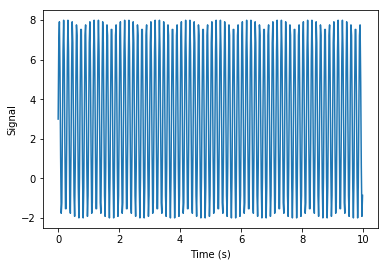

In [24]:
fs = 50 # in Hz
dt = 1/fs
f_sig =  7 # in Hz
start = 0.0 # in seconds
stop = 10.0 # in seconds
time = np.arange(start, stop, dt)
x = 5 * np.sin(2 * np.pi * f_sig * time) + 3

plt.plot(time, x)
plt.xlabel("Time (s)")
plt.ylabel("Signal")

## 以上